In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

# Log Normal Distribution

In [2]:
df=pd.read_csv("waiting_time.csv")
df


,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439
...,...
90041,135.885984
90042,15.223970
90043,207.839528
90044,140.488418


<AxesSubplot:ylabel='Count'>

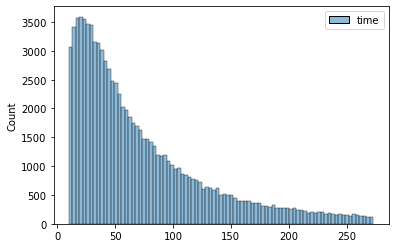

In [4]:
sns.histplot(df)

In [11]:
x1=10
x2=100
x3=1000
x4=10000

In [13]:
print("log(x1) : ",np.log(x1))
print("log(x2) : ",np.log(x2))
print("log(x3) : ",np.log(x3))
print("log(x4) : ",np.log(x4))

log(x1) :  2.302585092994046
log(x2) :  4.605170185988092
log(x3) :  6.907755278982137
log(x4) :  9.210340371976184


<AxesSubplot:ylabel='Count'>

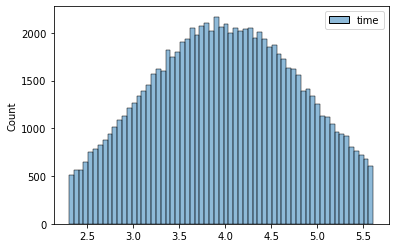

In [14]:
sns.histplot(np.log(df))

<AxesSubplot:ylabel='Count'>

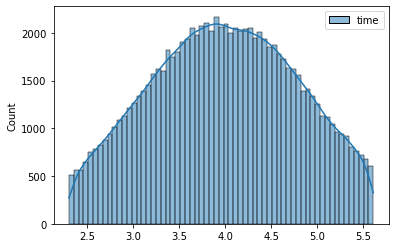

In [18]:
sns.histplot(np.log(df),kde=True)

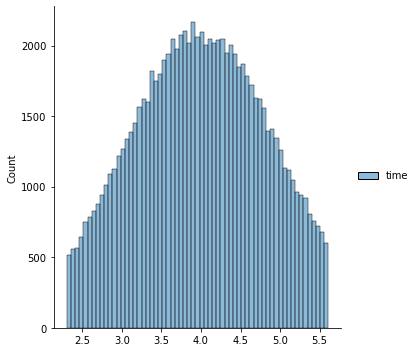

In [19]:
sns.displot(np.log(df))

# Simulations

In [5]:
def simulate_two_gaussians(n_samples, n_simulations=1000, mu1=0, mu2=1, s1=1, s2=1):
    samples_1 = [np.random.normal(loc=mu1, scale=s1, size=n_samples) for i in range(n_simulations )]
    means_1 = np.mean(samples_1, axis=1)
    
    samples_2 = [np.random.normal(loc=mu2, scale=s2, size=n_samples) for i in range(n_simulations)]
    means_2 = np.mean(samples_2, axis=1)

    
    sns.histplot(means_1, bins=50, color="red")
    sns.histplot(means_2, bins=50, color="blue")
    plt.show()
    sns.kdeplot(means_1, color="red")
    sns.kdeplot(means_2, color="blue")
    plt.axvline(means_1.mean(), color="red",linestyle="--")
    plt.axvline(means_2.mean(), color="blue",linestyle="--")
   

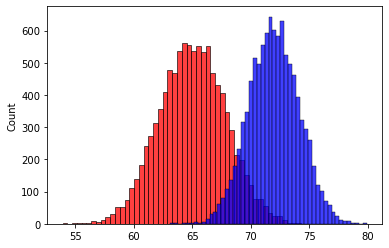

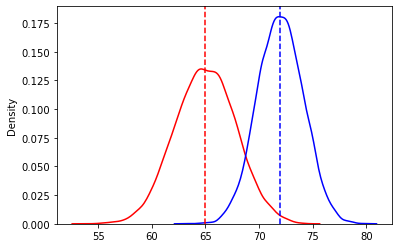

In [29]:
n_samples = 2
n_simulations = 10000
mu1 = 65
mu2 = 72
s1 = 4
s2 = 3
simulate_two_gaussians(n_samples=n_samples, n_simulations=n_simulations, mu1=mu1, mu2=mu2, s1=s1, s2=s2)

In [22]:
1-t.cdf((70-65)/(4/np.sqrt(2)),df=1)

0.16386782498092456

In [23]:
1-t.cdf((70-65)/(4/np.sqrt(10)),df=9)

0.001670134201011364

# Standardisation and Normalisation

In [31]:
df=pd.read_csv("weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<AxesSubplot:xlabel='Weight', ylabel='Height'>

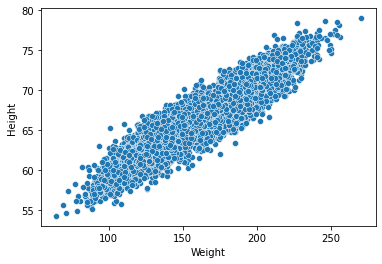

In [33]:
sns.scatterplot(x=df["Weight"],y=df["Height"])

In [38]:
df["Height_Standard"]=(df["Height"]-df["Height"].mean())/df["Height"].std()
df["Weight_Standard"]=(df["Weight"]-df["Weight"].mean())/df["Weight"].std()

In [39]:
df["Height"].mean()

66.36755975482106

In [40]:
df["Weight"].mean()

161.44035683283076

In [41]:
df["Height_Standard"].mean()

4.7031045724565956e-14

In [42]:
df["Weight_Standard"].mean()

3.589573083218056e-16

<AxesSubplot:xlabel='Weight_Standard', ylabel='Height_Standard'>

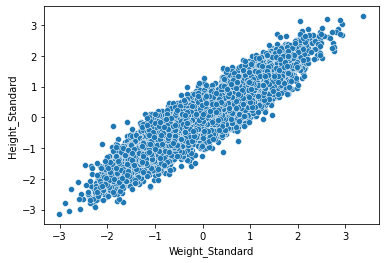

In [44]:
sns.scatterplot(x=df["Weight_Standard"],y=df["Height_Standard"])

In [45]:
df["Height_minmax"]=(df["Height"]-df["Height"].min())/(df["Height"].max()-df["Height"].min())
df["Weight_minmax"]=(df["Weight"]-df["Weight"].min())/(df["Weight"].max()-df["Weight"].min())

<AxesSubplot:xlabel='Weight_minmax', ylabel='Height_minmax'>

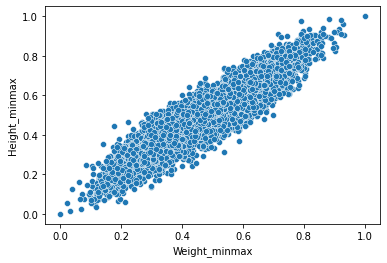

In [46]:
sns.scatterplot(x=df["Weight_minmax"],y=df["Height_minmax"])

In [ ]:
# scikit learn

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [54]:
df=pd.read_csv("weight-height.csv")
df.drop(columns=["Gender"],inplace=True)

In [55]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [56]:
df_standard=StandardScaler().fit_transform(df)
df_standard

array([[ 1.94406149,  2.50579697],
       [ 0.62753668,  0.02710064],
       [ 2.01244346,  1.59780623],
       ...,
       [-0.64968792, -1.02672965],
       [ 0.69312469,  0.07512745],
       [-1.14970831, -1.48850724]])

<AxesSubplot:>

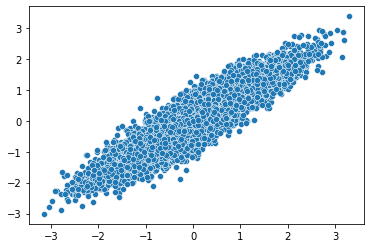

In [57]:
sns.scatterplot(x=df_standard[:,0],y=df_standard[:,1])

In [58]:
df_normalised=MinMaxScaler().fit_transform(df)
df_normalised

array([[0.79172838, 0.863139  ],
       [0.58695829, 0.4754764 ],
       [0.8023644 , 0.72113127],
       ...,
       [0.38830089, 0.31065968],
       [0.59715974, 0.48298768],
       [0.31052854, 0.23843869]])

<AxesSubplot:>

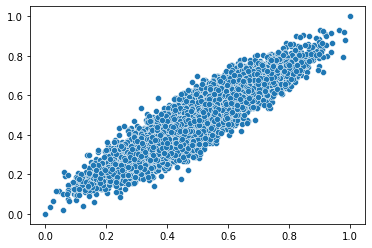

In [59]:
sns.scatterplot(x=df_normalised[:,0],y=df_normalised[:,1])